In [3]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [4]:
X = np.random.normal(10, 5, 100)

In [5]:
np.mean(X)

10.038046050608346

In [6]:
X = tuple(X)

In [7]:
samples = []
for i in range(100):
    samples+=[rd.sample(list(X),k = 60)]

In [8]:
means =[]
for sample in samples:
    means += [np.mean(sample)]

In [9]:
print(means)

[10.174393213291891, 9.704818320139994, 9.797241429584439, 9.749538790453373, 9.582204704815505, 10.55867248695326, 10.13978827906482, 10.424221487903717, 10.213601745986889, 10.663855677531123, 10.694057377984931, 10.38426485173921, 9.837362345196714, 9.92052876418781, 9.994635695680039, 9.159548156991889, 9.851730218211578, 9.749227961845502, 10.154657582420016, 10.10409950201265, 10.71480543676414, 9.793200149883294, 10.681529263522409, 9.618675813537466, 10.35187906372074, 9.528007510495485, 9.796941874556927, 10.338752053090522, 9.532670767829115, 9.811174821367615, 9.266831793513319, 10.112073002788696, 9.465915197462245, 10.125022114174351, 10.20275367860154, 9.941694577718772, 10.508717367781543, 9.616415123735578, 9.34773675978961, 10.895901490047386, 9.881643739947828, 9.84270826943301, 10.277810781716475, 9.95215684514402, 9.967341904980087, 10.14289842426576, 9.88661888289051, 10.005952971832324, 9.435948111542407, 10.182815864413962, 10.554367164865601, 9.6415735773841, 9.

(array([ 8.,  6., 17., 23., 18., 15.,  6.,  6.,  0.,  1.]),
 array([ 9.13685413,  9.35761259,  9.57837105,  9.79912952, 10.01988798,
        10.24064645, 10.46140491, 10.68216338, 10.90292184, 11.12368031,
        11.34443877]),
 <BarContainer object of 10 artists>)

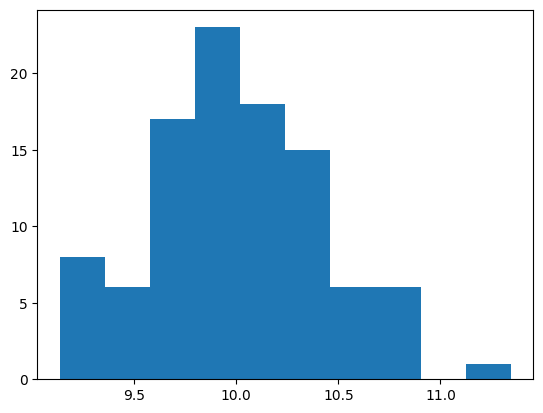

In [10]:
plt.hist(means)

In [11]:
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.model_selection import train_test_split

In [12]:
X = pd.DataFrame(load_wine()['data'])
Y = pd.DataFrame(load_wine()['target'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 100)

In [13]:
models = []
for i in range(50):
    tmp = pd.concat([X_train,y_train], axis = 1).sample(119, replace = True)
    model = DecisionTreeClassifier()
    model.fit(X = tmp.iloc[:,:-1], y = tmp.iloc[:,-1])
    models += [model]


In [14]:
from sklearn.metrics import accuracy_score
import scipy.stats as st

In [15]:
preds = []
acc = []
for model in models:
    preds += [model.predict(X_test)]
    acc += [accuracy_score(y_true=y_test, y_pred = model.predict(X_test))]

import scipy.stats as st

In [16]:

from sklearn.metrics import accuracy_score

In [17]:
bagging_pred = pd.DataFrame(preds).transpose().apply(lambda x: st.mode(x)[0][0], axis = 1).values
#accuracy_score(y_true=y_test, y_pred = bagging_pred)

<ipython-input-17-015f5b11198a>:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  bagging_pred = pd.DataFrame(preds).transpose().apply(lambda x: st.mode(x)[0][0], axis = 1).values


In [18]:
accuracy_score(y_true=y_test, y_pred = bagging_pred)

0.864406779661017

(array([ 1.,  2.,  4., 10.,  7.,  9.,  6.,  7.,  1.,  3.]),
 array([0.77966102, 0.79491525, 0.81016949, 0.82542373, 0.84067797,
        0.8559322 , 0.87118644, 0.88644068, 0.90169492, 0.91694915,
        0.93220339]),
 <BarContainer object of 10 artists>)

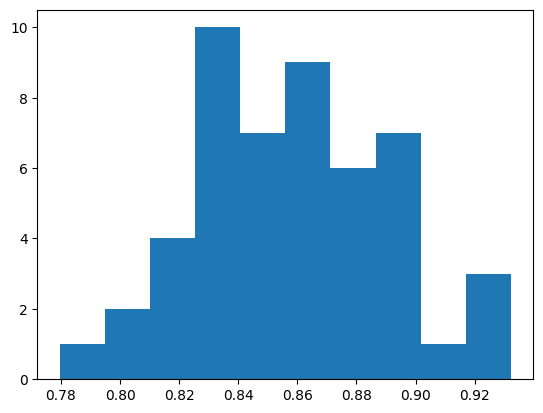

In [19]:
plt.hist(acc)

In [20]:
model = DecisionTreeClassifier()

In [21]:
 model.fit(X = X_train, y = y_train)

DecisionTreeClassifier()

In [22]:
accuracy_score(y_true=y_test, y_pred = model.predict(X_test))

0.864406779661017

Более простой способ бэггинга

In [23]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(n_estimators = 50,oob_score = True)

In [24]:
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(n_estimators=50, oob_score=True)

In [25]:
accuracy_score(y_true=y_test, y_pred = model.predict(X_test))

0.864406779661017

In [26]:
model.oob_score_

0.9411764705882353

In [28]:
np.random.seed(1000)

In [29]:
X = np.random.normal(5,2,size=100)

In [31]:
np.random.choice(X,replace=True,size=100)

array([ 6.28864766,  2.60786033,  4.04003385,  5.36014991,  9.09144749,
        1.61000337,  7.78884549,  6.33405156, 10.39929171,  6.83877508,
        3.83167155,  4.8614374 ,  6.73452163,  3.70564615,  3.32934353,
        6.33405156,  6.7148655 ,  5.8306949 ,  4.07066495,  4.8010366 ,
        3.02650534,  9.09144749,  3.89965227,  5.64186309,  6.63649939,
        3.38776878,  5.35587421,  6.63649939,  1.76403553,  6.33405156,
        3.83264711,  4.7851254 ,  8.20016674,  6.30232506,  6.83877508,
        3.83264711,  5.16641898,  6.33405156,  3.7304566 ,  7.14642665,
       10.39929171,  4.18807968,  5.06151589,  2.46795292,  4.84268199,
        6.33405156,  3.83167155, 10.72353835,  4.64389111,  4.3391989 ,
       10.72353835,  2.15325883,  6.33405156,  6.28848522,  5.64186309,
        3.7304566 ,  4.23370518,  4.94903424,  3.39108339,  2.96796076,
        6.33456261, 10.14951839,  6.83877508,  4.94903424,  2.60786033,
       10.72353835,  2.91912583,  2.91912583,  4.26448844,  4.04

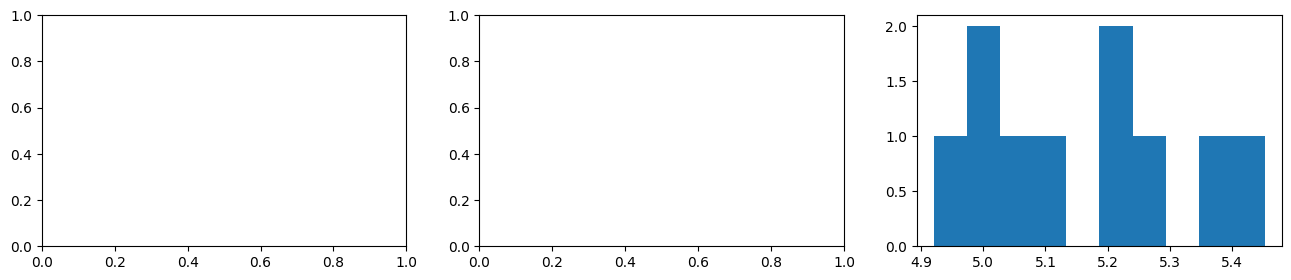

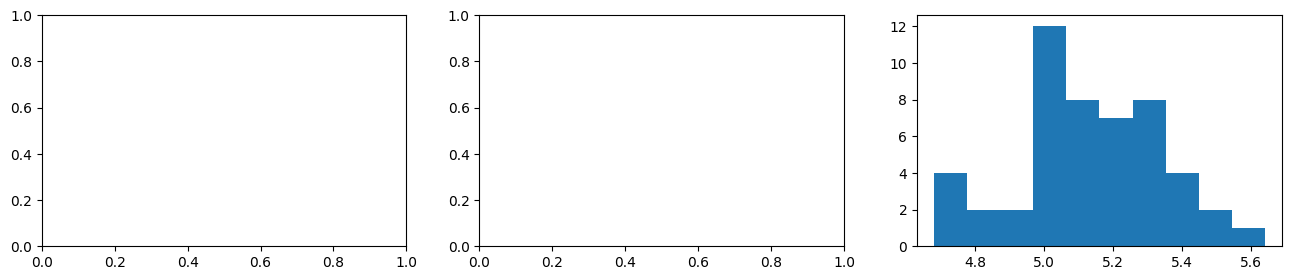

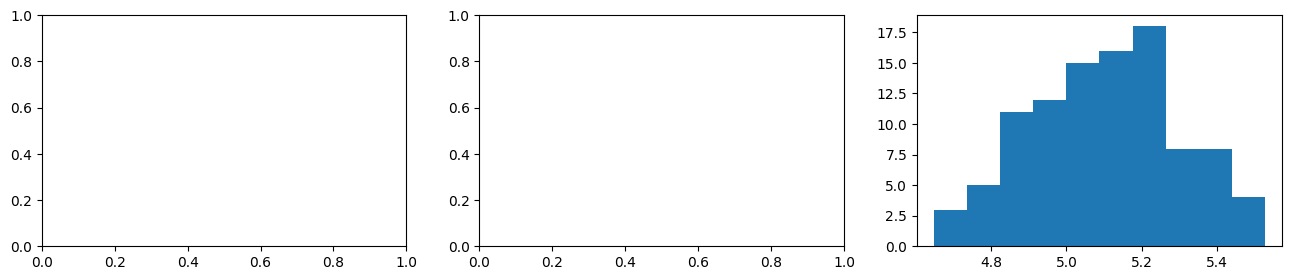

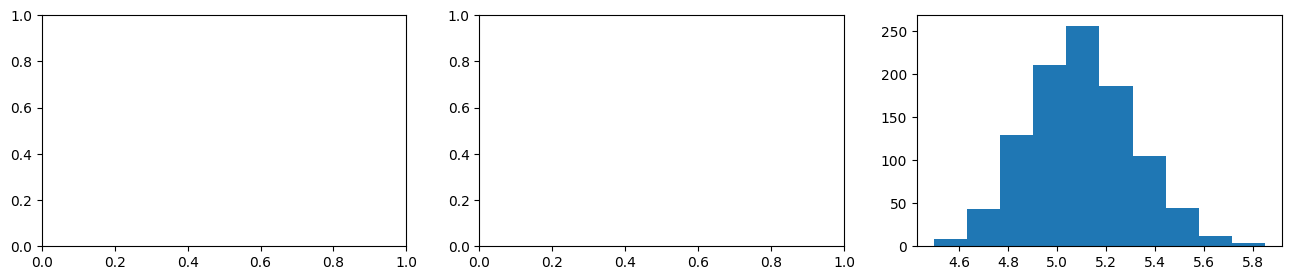

In [36]:
for n in [10,50,100,1000]:
  samples=[]
  for i in range(n):
    samples +=[np.random.choice(X,replace=True,size=100)]
  fig,ax=plt.subplots(1,3,figsize=(16,3))
  plt.hist([np.mean(smpl) for smpl in samples])
  plt.show()

In [44]:
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,recall_score,precision_score
from sklearn.preprocessing import LabelBinarizer




In [45]:
import pandas as pd

In [46]:
load_wine()

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [49]:
X = load_wine()['data']
y = load_wine()['target']
labels = load_wine()['feature_names']
lb = LabelBinarizer()
print(y[:6])
y1 = lb.fit_transform(y)
print(y1[:6])
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.25, random_state=100)

model=DecisionTreeClassifier()

[0 0 0 0 0 0]
[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [53]:
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print(precision_score(y_test,y_pred,average='micro'))
print(recall_score(y_test,y_pred,average='micro'))

0.8444444444444444
0.8444444444444444


In [59]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(n_estimators = 1000,oob_score = True,max_features=0.5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(precision_score(y_test,y_pred,average='micro'))
print(recall_score(y_test,y_pred,average='micro'))

0.9777777777777777
0.9777777777777777


Случайный лес

In [60]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(precision_score(y_test,y_pred,average='micro'))
print(recall_score(y_test,y_pred,average='micro'))

0.9777777777777777
0.9777777777777777
